### Multi Layer Perceptron Classifier 
This will use the mulit layer perceptron classifier to construct a model on a training set, then perform analysis on the test data for performance evaluation.
https://scikit-learn.org/stable/modules/neural_networks_supervised.html


DXG - 2021-09-25

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix

In [11]:
# User defined function for accuracy
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [12]:
# Load dataset
dataset = pd.read_csv('../featureSelectedDataset.csv')  
dataset.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",CO2 emissions from solid fuel consumption (% of total),Crop production index (2004-2006 = 100),Livestock production index (2004-2006 = 100),Permanent cropland (% of land area),"Population, female (% of total)",Rural population (% of total population),"Life expectancy at birth, total (years)",Year,CountryName,MeanLifeExpetancyOverall,MeanLifeExpetancyForYear,AboveAverageLifeExpectancyOverall,AboveAverageLifeExpectancyByYear
0,145.3210,11.947431,0.801756,51.614,35.807860,73.15,48.66,0.111816,48.634625,90.574,34.092878,1964,Afghanistan,64.193563,55.937218,False,False
1,46.6478,4.605392,3.168264,20.500,61.654161,34.23,61.43,0.021999,49.604197,16.890,70.880976,1964,Australia,64.193563,55.937218,True,True
2,56.3066,20.065391,0.229381,18.500,48.662900,93.29,72.46,0.811334,53.270334,35.038,69.921951,1964,Austria,64.193563,55.937218,True,True
3,88.5072,8.691025,0.378911,45.799,0.000000,18.74,35.63,0.709471,52.189871,88.199,39.136854,1964,Benin,64.193563,55.937218,False,False
4,100.5586,1.237884,0.336018,43.539,0.247525,24.62,20.76,0.126465,50.360061,62.043,43.430220,1964,Bolivia,64.193563,55.937218,False,False


In [13]:
# Split the dataset into features and obs

X = dataset.iloc[:,0:10]
y = dataset["AboveAverageLifeExpectancyByYear"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Fit the model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)

In [15]:
# Fit the model and get accuracy
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=2000)

y_score = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
print('Accuracy of MLPClassifier : ', accuracy(cm))

Accuracy of MLPClassifier :  0.8925459825750242


In [24]:
y_pred_train = clf.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
print('Accuracy of MLPClassifier (training): ', accuracy(cm))

Accuracy of MLPClassifier (training):  0.8933937514905795


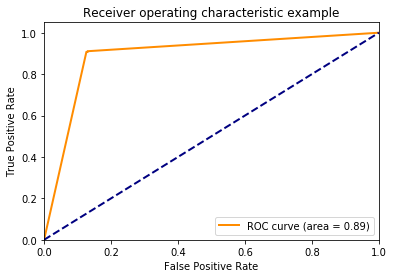

In [23]:
# Generate ROC plot
fpr2, tpr2, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc2 = auc(fpr2, tpr2)

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('MLClassfierROC.jpg', dpi=300)
plt.show()